# Capstone 2 - Modeling

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [15]:
# Load data from csv file
df=pd.read_csv('preprocessed_train.csv')

In [16]:
df.shape

(1456, 321)

In [17]:
# The dependent feature
y = df[['SalePrice']]

In [18]:
# Drop the dependent feature from dataset
X = df.drop(['SalePrice'],axis=1)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [20]:
# Model 1: Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)

In [21]:
predictions = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error
print("R^2 is: ", model.score(X_test, y_test))
print('RMSE is: ', mean_squared_error(y_test, predictions))

R^2 is:  0.3622714004366272
RMSE is:  0.0996337974828447


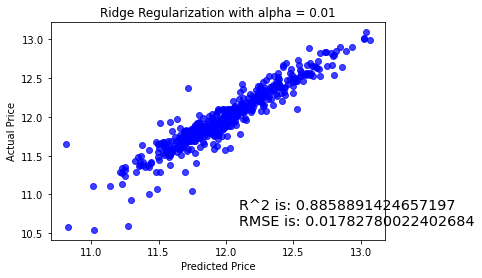

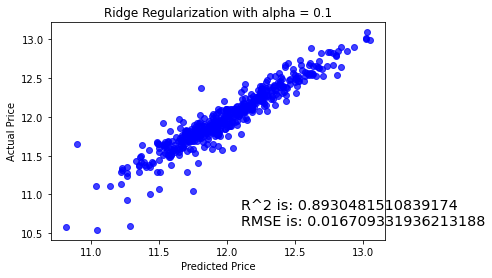

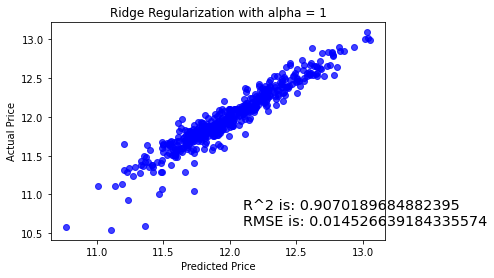

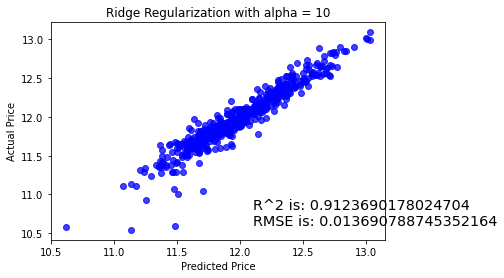

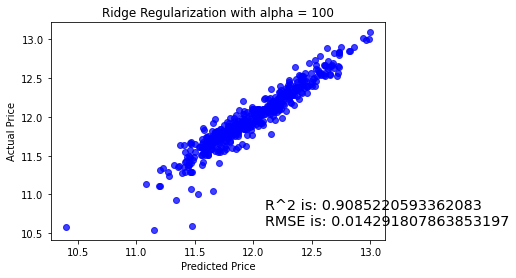

In [23]:
# Model 2: Ridge Regression
actual_values = y_test
from sklearn import linear_model
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
print("R^2 is: ", ridge_model.score(X_test, y_test))
print('RMSE is: ', mean_squared_error(y_test, preds_ridge))

R^2 is:  0.9085220593362083
RMSE is:  0.014291807863853197


In [27]:
# Model 3: Lasso GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import  GridSearchCV
lasso = Lasso()
params = {"alpha" : [ 1e-3, 1e-2, 1, 1e1, 
                     1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

In [28]:
lasso_regressor = GridSearchCV(lasso, params, cv=5)

In [29]:
lasso_model=lasso_regressor.fit(X_train, y_train)

In [30]:
preds_lasso=lasso_model.predict(X_test)

In [31]:
print("R^2 is: ", lasso_model.score(X_test, y_test))
print('RMSE is: ', mean_squared_error(y_test, preds_lasso))

R^2 is:  0.916220885704386
RMSE is:  0.013089002614492001


In [32]:
lasso_regressor.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
# Model 4: DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=9,random_state=27)
DT_model=model.fit(X_train, y_train)
preds_DT=DT_model.predict(X_test)

In [36]:
print("R^2 is: ", DT_model.score(X_test, y_test))
print('RMSE is: ', mean_squared_error(y_test, preds_DT))

R^2 is:  0.7442167847332383
RMSE is:  0.039961596652318444
